# 数据合并与分类

1. 合并北京线数据
2. 根据`triptype`分类输出

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os,glob

## 数据合并

In [2]:
from_path = r"E:\Netease\智慧城市\4.处理数据\workingdata"
to_path = r"E:\Netease\智慧城市\4.处理数据\workingdata2"

In [3]:
file_lst = glob.glob(from_path+r"\track_zj*.shp")
print(file_lst)

['E:\\Netease\\智慧城市\\4.处理数据\\workingdata\\track_zj_0.shp', 'E:\\Netease\\智慧城市\\4.处理数据\\workingdata\\track_zj_1.shp', 'E:\\Netease\\智慧城市\\4.处理数据\\workingdata\\track_zj_11.shp', 'E:\\Netease\\智慧城市\\4.处理数据\\workingdata\\track_zj_13.shp', 'E:\\Netease\\智慧城市\\4.处理数据\\workingdata\\track_zj_15.shp', 'E:\\Netease\\智慧城市\\4.处理数据\\workingdata\\track_zj_2.shp', 'E:\\Netease\\智慧城市\\4.处理数据\\workingdata\\track_zj_28.shp', 'E:\\Netease\\智慧城市\\4.处理数据\\workingdata\\track_zj_3.shp', 'E:\\Netease\\智慧城市\\4.处理数据\\workingdata\\track_zj_4.shp', 'E:\\Netease\\智慧城市\\4.处理数据\\workingdata\\track_zj_5.shp']


In [ ]:
df_sum_f = pd.concat([gpd.read_file(file) for file in file_lst])

## 数据多线转单线

In [5]:
df_sum_f = gpd.read_file(os.path.join(to_path,"track_all_f.shp"))
print(len(df_sum_f)) # 李羿蒲同学数据包括45576条数据、816745个驻足点/照片

16280


In [7]:
df_sum = df_sum_f.explode()
df_sum.head()

In [8]:
df_sum.to_file(to_path+r"\track_all.shp", encoding = 'utf-8')

## 数据分类

### 如果重启使用

In [3]:
from_path = r"E:\Netease\智慧城市\4.处理数据\workingdata2"
to_path = r"E:\Netease\智慧城市\4.处理数据\workingdata3"
i_lst = []

In [ ]:
df_sum = gpd.read_file(from_path+r"\track_all.shp")

### 可直接使用

In [15]:
i_lst = df_sum["triptype"]

In [16]:
i_lst

0          观光旅行
1          观光旅行
2          观光旅行
3          观光旅行
4          观光旅行
           ... 
4155781      徒步
4155782      徒步
4155783      徒步
4155784      徒步
4155785      徒步
Name: triptype, Length: 4155786, dtype: object

In [17]:
i_set = set(i_lst)

In [19]:
for i in i_set:
    df = df_sum[df_sum["triptype"]==i]
    print(i,len(df))
    df.to_file(to_path+r"\track_{}.shp".format(i),encoding="utf-8")

其他
观光旅行
徒步
骑行
Gps作画
摄影
摩托车
寻宝
越野跑
跑步
crosscountry
自驾车
登山
滑雪
滑翔伞
山地骑行


<Axes: >

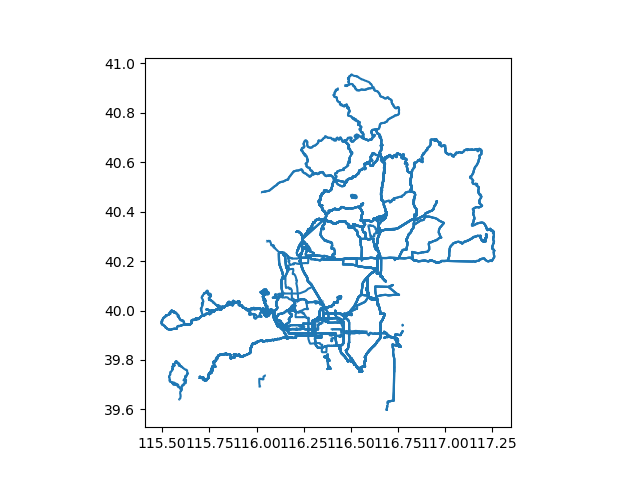

In [34]:
fig,ax = plt.subplots(1,1)
df.plot(ax=ax,legend=True)